In [1]:
import pymysql
from pymysql.cursors import DictCursor
import matplotlib
import matplotlib.pyplot as plt
from pymysql.cursors import DictCursor
import pandas as pd
import mysql.connector
import numpy as np
import random

Функция создания бд:

In [ ]:
def create_database():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522'
    ) as connection:
            curss = connection.cursor()
        
            sql = f"""
        CREATE DATABASE IF NOT EXISTS platformio        
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_database()

Функция создания таблицы пользователей, первичный ключ - id, внешний ключ по отношению к таблице стран - country_id

In [ ]:
def create_table_user():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
        CREATE TABLE IF NOT EXISTS user (
        id  INT unsigned auto_increment PRIMARY KEY, 
        country_id INT, 
        created_at DATETIME,
        FOREIGN KEY (country_id) REFERENCES country (id))        
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_table_user()

Создание таблицы стран, первичный ключ - id:

In [ ]:
def create_table_country():
        with pymysql.connect(
        host='localhost',
        user='root',
        password = 'book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
        CREATE TABLE IF NOT EXISTS country (
        id INT PRIMARY KEY , 
        name VARCHAR(50))        
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_table_country()

In [ ]:
def create_table_transaction():
        with pymysql.connect(
        host='localhost',
        user='root',
        password = 'book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
        CREATE TABLE IF NOT EXISTS transaction(
        id INT unsigned auto_increment PRIMARY KEY, 
        user_id INT unsigned, 
        amount DECIMAL(5,2), 
        transaction_type_id INT unsigned, 
        created_at DATETIME,
        FOREIGN KEY (user_id) REFERENCES user(id),  
        FOREIGN KEY (transaction_type_id) REFERENCES transaction_type(id))       
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_table_transaction()

Идекс для транзакций по количеству:

In [ ]:
def create_index():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
            sql = f"""
            CREATE INDEX test_index_amount
            USING btree
            ON transaction (amount)
;
        
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_index()

Создание таблицы типов транзакций с ограничением по значению поля unique_name и первичным ключом id:

In [ ]:
def create_table_transaction_type():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
        CREATE TABLE IF NOT EXISTS transaction_type(
        id INT unsigned auto_increment PRIMARY KEY, 
        unique_name VARCHAR(20) 
        CHECK (unique_name = 'DEPOSIT' OR unique_name = 'SPEND'))       
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_table_transaction_type()

Создание таблицы компаний с первичным ключом id, внешними ключами user id к user и campaign_category_id к campaign_category:

In [ ]:
def create_table_campaign():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
        CREATE TABLE IF NOT EXISTS campaign(
        id INT unsigned auto_increment PRIMARY KEY, 
        user_id INT unsigned, 
        campaign_category_id INT unsigned,  
        FOREIGN KEY (user_id) REFERENCES user(id), 
        FOREIGN KEY (campaign_category_id) REFERENCES campaign_category(id))       
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_table_campaign()

Создание таблицы категорий компаний с первичным ключом id:

In [ ]:
def create_table_campaign_category():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
        CREATE TABLE campaign_category(
        id INT unsigned auto_increment PRIMARY KEY, 
        name VARCHAR(50))       
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
create_table_campaign_category()

Заполнение таблицы пользователей:

In [ ]:
def insert_data_user():
    with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()

            sql = f"""
        INSERT INTO user (country_id, created_at)
        VALUES 
        (36, '2019-01-01 22:33:12.457'), 
        (40, '2020-01-02 21:34:13.457'),
        (312, '2020-01-03 20:35:14.457'),
        (108, '2020-01-04 19:36:15.457'),
        (276, '2020-01-05 18:37:12.457'),
        (36, '2020-01-06 17:38:16.457'),
        (276, '2020-01-07 16:39:17.457'),
        (124, '2020-01-08 15:40:18.457'),
        (108, '2020-01-08 14:41:19.457'),
        (887, '2020-01-09 13:42:20.457'),
        (40, '2017-01-10 12:43:12.457'),
        (276, '2020-01-11 11:44:12.457'),
        (356, '2018-01-12 10:45:12.457'),
        (36, '2020-01-13 09:46:12.457'),
        (356, '2020-01-14 08:47:12.457')
;
        """
            curss.execute(sql)
            connection.commit()

In [ ]:
insert_data_user()

Заполнение таблицы стран:

In [ ]:
def insert_data_country():
    with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
            
            sql = f"""
        INSERT INTO country (id, name)
        VALUES 
        (36, 'Australia'), 
        (40, 'Austria'),
        (312, 'Guadeloupe'),
        (108, 'Burundi'),
        (276, 'Germany'),
        (124, 'Canada'),
        (887, 'Yemen'),
        (356, 'India')
;
        """
          
            curss.execute(sql)
            connection.commit()

In [ ]:
insert_data_country()

Генерация данных для таблицы транзакций и заполнение таблицы:

In [ ]:
def generation_data_transaction():
    data = []
    mu = 100 # мат ожидание для количества транзакций
    sigma = 10 # отклонение
    enddate = "2019-12-29 19:34:24.576" # начальная дата для генерации транзакций
    for i in range(1,750):
        num_daily_transactions = -1
        while (0 <= num_daily_transactions <= 150) == False:
            num_daily_transactions = random.gauss(mu, sigma) # генерируем количество транзакций в день
                                                             # по нормальному распределению в промежутке [0, 50]
        num_daily_transactions -= mu/2 if random.random() < 0.25 else 0 # для просадки активности  
        for j in range (round(num_daily_transactions)):
            data.append(
                (np.random.randint(1, 16), round(np.random.uniform(0.01, 99.99), 2), np.random.randint(1, 3), enddate)
            ) 
        enddate = pd.to_datetime(enddate) + pd.offsets.Day(1)  
    data = str(data)[1:-1]    
    return data

In [ ]:
def insert_data_transaction():
    with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
            
            data = generation_data_transaction()
            sql = f"""
        INSERT INTO transaction(user_id, amount, transaction_type_id, created_at)
        VALUES {data}
        """
          
            curss.execute(sql)
            connection.commit()

In [ ]:
insert_data_transaction()

Заполнение таблицы типов транзакций:

In [ ]:
def insert_data_transaction_type():
    with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
            
            sql = f"""
        INSERT INTO transaction_type (unique_name)
        VALUES 
        ('DEPOSIT'), 
        ('SPEND')
;
        """

            curss.execute(sql)
            connection.commit()

In [ ]:
insert_data_transaction_type()

Заполнение таблицы компаний:

In [ ]:
def insert_data_campaign():
    with pymysql.connect(
        host='localhost',
        user='root',
        password='***',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
            
            sql = f"""
        INSERT INTO campaign (id, user_id, campaign_category_id)
        VALUES 
        (3, 7), 
        (2, 5),
        (1, 3), 
        (7, 1),
        (5, 6),
        (6, 4),
        (4, 2),
        (9, 1),
        (8, 7),
        (12, 1),
        (11, 3),
        (10, 5),
        (13, 6),
        (15, 4),
        (14, 2)
;
        """

            curss.execute(sql)
            connection.commit()

In [ ]:
insert_data_campaign()

Заполнение таблицы категорий компаний:

In [ ]:
def insert_data_campaign_category():
    with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
            
            sql = f"""
        INSERT INTO campaign_category(name)
        VALUES 
        ('Games'), 
        ('Mobile'),
        ('Desktop'), 
        ('Advertising'),
        ('Researching'), 
        ('Hardware'),
        ('Apps')
;
        """

            curss.execute(sql)
            connection.commit()

In [ ]:
insert_data_campaign_category()

Monthly Active Users с 2020 года:

In [12]:
def MAU():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
            SELECT DATE_FORMAT(created_at,'%Y-%m') AS 'YearMonth',COUNT(transaction.user_id) AS 'MAU'
            FROM transaction
            LEFT OUTER JOIN transaction_type 
            ON (transaction.transaction_type_id = transaction_type.id) 
            WHERE (unique_name = 'SPEND' AND YEAR(created_at) >= 2020)
            GROUP BY DATE_FORMAT(created_at,'%Y-%m')
            ORDER BY created_at
        
        """
            curss.execute(sql)
            df = curss.fetchall()
            return pd.DataFrame(df)

In [13]:
MAU()

,YearMonth,MAU
0,2020-01,1424
1,2020-02,1267
2,2020-03,1287
3,2020-04,1439
4,2020-05,1284
5,2020-06,1371
6,2020-07,1314
7,2020-08,1367
8,2020-09,1246
9,2020-10,1216


Daily Active Users с 2020 года:

In [14]:
def DAU():
        with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
            SELECT DATE_FORMAT(created_at,'%Y-%m-%d') AS YearMonthDay, 
            COUNT(transaction.user_id) AS DAU
            FROM transaction
            LEFT OUTER JOIN transaction_type 
            ON transaction.transaction_type_id = transaction_type.id 
            WHERE unique_name = 'SPEND' AND YEAR(created_at) >= 2020
            GROUP BY DATE_FORMAT(created_at,'%Y-%m-%d')
            ORDER BY created_at
        
        """
           
            curss.execute(sql)
            df = curss.fetchall()
            return pd.DataFrame(df)

In [15]:
DAU()

,YearMonthDay,DAU
0,2020-01-01,48
1,2020-01-02,53
2,2020-01-03,41
3,2020-01-04,55
4,2020-01-05,16
...,...,...
741,2022-01-11,56
742,2022-01-12,29
743,2022-01-13,38
744,2022-01-14,49


График, отображающий активность по месяцам, на котором можно наблюдать просадку:

In [7]:
def info_for_drawdown_au():
    with pymysql.connect(
        host='localhost',
        user='root',
        password='book7330522',
        db='platformio',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor, 
        port=3306
    ) as connection:
            curss=connection.cursor()
        
            sql = f"""
            SELECT DATE_FORMAT(created_at,'%Y-%m') AS 'YearMonth',COUNT(transaction.user_id) AS 'MAU'
            FROM transaction
            LEFT OUTER JOIN transaction_type 
            ON (transaction.transaction_type_id = transaction_type.id) 
            WHERE (unique_name = 'SPEND' AND YEAR(created_at) >= 2020)
            GROUP BY DATE_FORMAT(created_at,'%Y-%m')
            ORDER BY created_at
        
        """
            curss.execute(sql)
            df = curss.fetchall()
            df = pd.DataFrame(df)
            return df

In [8]:
def plot_drawdown_au():
            df = info_for_drawdown_au()
            months = df['YearMonth']
            users_by_months = df['MAU']
            plt.bar(months, users_by_months)
            plt.xlabel('Months')
            plt.ylabel('Users')
            plt.title("Drawdown by Months")

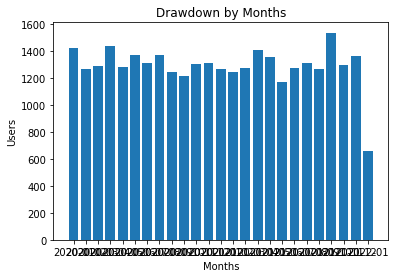

In [9]:
plot_drawdown_au()

Для отсортированного по активности в месяц:

In [10]:
def plot_drawdown_au():
            df = info_for_drawdown_au()
            df = df.sort_index().sort_values('MAU', kind='mergesort') # сортируем
            months = df['YearMonth']
            users_by_months = df['MAU']
            plt.bar(months, users_by_months)
            plt.xlabel('Sorted Months')
            plt.ylabel('Users')
            plt.title("Sorted Drawdown by Months")

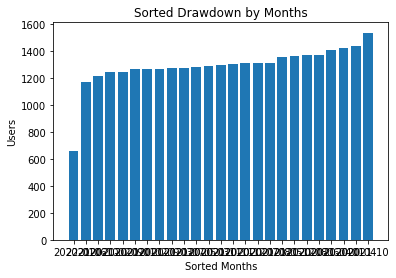

In [11]:
plot_drawdown_au()

Как видим, просадка прослеживается на столбцах 0-2, что происходит в силу заданной генерации данных, а именно:
num_daily_transactions -= mu/2 if random.random() < 0.25 else 0
то есть просадка возможна с вероятностью 0.25
Просадка последнего месяца объясняется тем, что данные генерировались до середины последнего месяца